In [ ]:
%pip install matplotlib numpy pandas tensorflow-cpu tensorflow-docs pydot-ng graphviz

In [2]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras import layers

import os.path

In [3]:
# Import data
if not os.path.isfile('insurance.csv'):
	!wget 'https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv'

dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-04-05 00:46:53--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2024-04-05 00:46:53 (6.60 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
# encode categorical data

for column in dataset.columns:
	if dataset[column].dtype == 'object':
		encoder = layers.StringLookup(vocabulary=dataset[column].unique())
		dataset[column] = pd.Series(encoder(dataset[column]).numpy())

display(dataset.head())

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,2,33.8,1,2,2,1725.55
2,28,2,33.0,3,2,2,4449.46
3,33,2,22.7,0,2,3,21984.47
4,32,2,28.9,0,2,3,3866.86


In [5]:
# split dataset for training and testing
train_dataset, test_dataset = np.split(dataset, [int(0.8 * len(dataset))])
display(train_dataset.head())
display(test_dataset.head())

/usr/local/python/3.10.14/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,2,33.8,1,2,2,1725.55
2,28,2,33.0,3,2,2,4449.46
3,33,2,22.7,0,2,3,21984.47
4,32,2,28.9,0,2,3,3866.86


,age,sex,bmi,children,smoker,region,expenses
1070,37,2,37.1,1,1,2,39871.70
1071,63,2,31.4,0,2,4,13974.46
1072,21,2,31.3,0,2,3,1909.53
1073,54,1,28.9,2,2,4,12096.65
1074,60,1,18.3,0,2,4,13204.29


In [6]:
# pop off expenses column for labels
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

# display(train_dataset.head())
# display(train_labels.head())

In [7]:
# create normalizer (still unclear what this does or why it helps increase accuracy)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [8]:
# build and compile model

model = tf.keras.Sequential([
	normalizer,
	layers.Dense(64),
	layers.Dense(64),
	layers.Dense(64),
	layers.Dense(1)
])

model.compile(
	loss=keras.losses.MeanAbsoluteError(),
	optimizer=keras.optimizers.Adam(),
	metrics=['mae', 'mse']
)

In [9]:
# train model
model.fit(train_dataset, train_labels, epochs=25)

Epoch 1/25
34/34 [==============================] - 1s 2ms/step - loss: 13213.5361 - mae: 13213.5361 - mse: 319285408.0000
Epoch 2/25
34/34 [==============================] - 0s 2ms/step - loss: 13207.3789 - mae: 13207.3789 - mse: 319148832.0000
Epoch 3/25
34/34 [==============================] - 0s 2ms/step - loss: 13151.5391 - mae: 13151.5391 - mse: 317838848.0000
Epoch 4/25
34/34 [==============================] - 0s 2ms/step - loss: 12847.5625 - mae: 12847.5625 - mse: 310506656.0000
Epoch 5/25
34/34 [==============================] - 0s 2ms/step - loss: 11854.3408 - mae: 11854.3408 - mse: 286339904.0000
Epoch 6/25
34/34 [==============================] - 0s 1ms/step - loss: 9744.4736 - mae: 9744.4736 - mse: 230414656.0000
Epoch 7/25
34/34 [==============================] - 0s 2ms/step - loss: 6628.1401 - mae: 6628.1401 - mse: 143227360.0000
Epoch 8/25
34/34 [==============================] - 0s 2ms/step - loss: 4549.7725 - mae: 4549.7725 - mse: 86591000.0000
Epoch 9/25
34/34 [=====

In [10]:
# see how we are doing
model.evaluate(test_dataset, test_labels)

9/9 [==============================] - 0s 1ms/step - loss: 3494.8337 - mae: 3494.8337 - mse: 46196956.0000


[3494.833740234375, 3494.833740234375, 46196956.0]

9/9 - 0s - loss: 3494.8337 - mae: 3494.8337 - mse: 46196956.0000 - 25ms/epoch - 3ms/step
Testing set Mean Abs Error: 3494.83 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


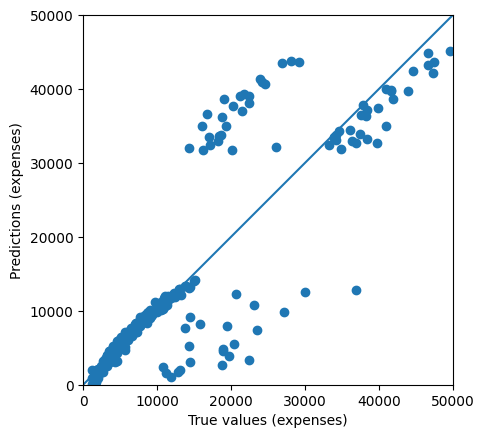

In [11]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
